<a href="https://colab.research.google.com/github/2j0123/WASSUP_Project_Team7_2/blob/US/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Woosung\\Desktop\\공부\\2024\\Estsoft\\프로젝트2\\files\\drugsComTrain_raw.tsv", sep = '\t')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB
None


condition중에 결측치. 나머지는 없음.

In [ ]:
print(df.head())

   Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           1

In [ ]:
df.dropna(axis=0, inplace=True) # 결측치가 있는 행 많지 않아서 제거
df.drop('date', axis=1, inplace=True) # 날짜는 딱히 필요 없으니까 제거
import html
df['review']=df['review'].apply(html.unescape)#html 문자 처리

In [ ]:
print(df['drugName'].nunique( )) #어떤 값들이 있는지
print(df['condition'].nunique( )) #어떤 값들이 있는지

3431
884


In [ ]:
df.describe()

,Unnamed: 0,rating,usefulCount
count,160398.000000,160398.000000,160398.000000
mean,115957.147309,6.995923,28.097613
std,67015.899492,3.272303,36.457876
min,2.000000,1.000000,0.000000
25%,58065.250000,5.000000,6.000000
50%,115845.500000,8.000000,16.000000
75%,173826.750000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


usefulcount 낮은 것들을 처리해야 할 것 같습니다.


In [ ]:
from matplotlib import pyplot as plt

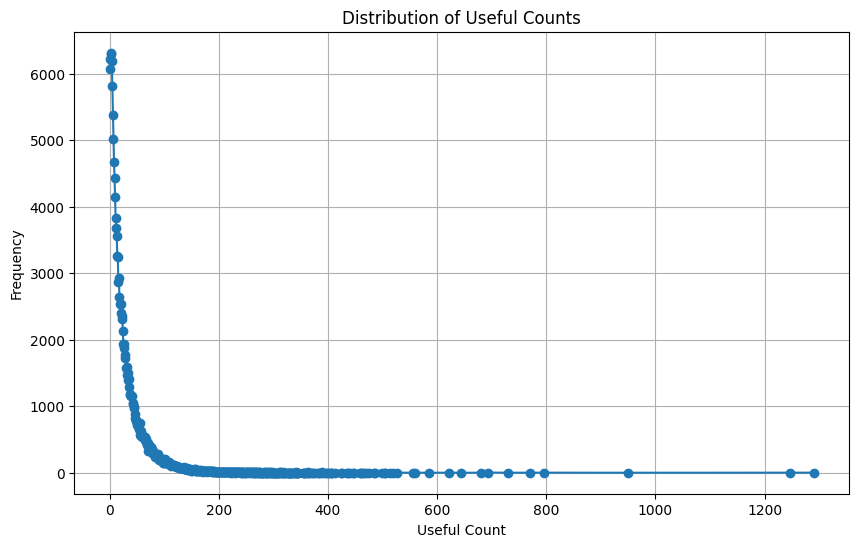

In [ ]:
useful_counts = df['usefulCount'].value_counts()

# 빈도수 데이터를 'usefulcount' 값에 따라 정렬
useful_counts= useful_counts.sort_index()

# 선형 그래프 그리기
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(useful_counts.index, useful_counts.values, marker='o', linestyle='-')
plt.title('Distribution of Useful Counts')
plt.xlabel('Useful Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
print(useful_counts.head(20))

usefulCount
0     6217
1     6061
2     6313
3     6298
4     6189
5     5809
6     5379
7     5022
8     4675
9     4435
10    4138
11    3829
12    3678
13    3565
14    3259
15    3240
16    2874
17    2929
18    2636
19    2539
Name: count, dtype: int64


In [ ]:
df=df[(df['usefulCount'] != 0) & (df['usefulCount'] != 1)] # 공감 못 받은 값들 제거.

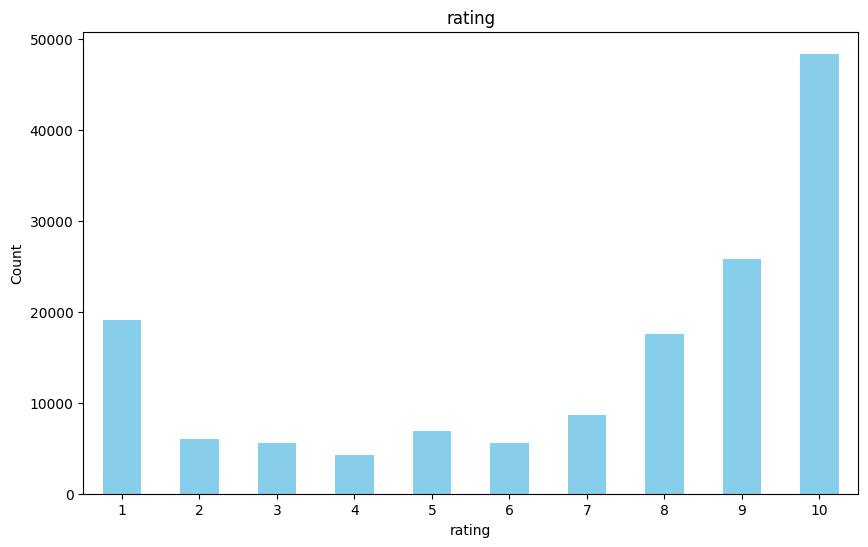

In [ ]:
score_counts = df['rating'].value_counts().sort_index()
all_scores = pd.Series(index=range(1, 11), data=0).fillna(0)

# 실제 점수 빈도와 병합하여 모든 점수를 포함하도록 함
all_scores = all_scores.add(score_counts, fill_value=0)

# 막대 그래프로 나타내기
plt.figure(figsize=(10, 6)) # 그래프 크기 설정
all_scores.plot(kind='bar', color='skyblue')
plt.title('rating')
plt.xlabel('rating')
plt.ylabel('Count')
plt.xticks(rotation=0) # x축 레이블 회전 설정
plt.show()

rating 10점이 좀 많은 것을 알 수 있습니다.

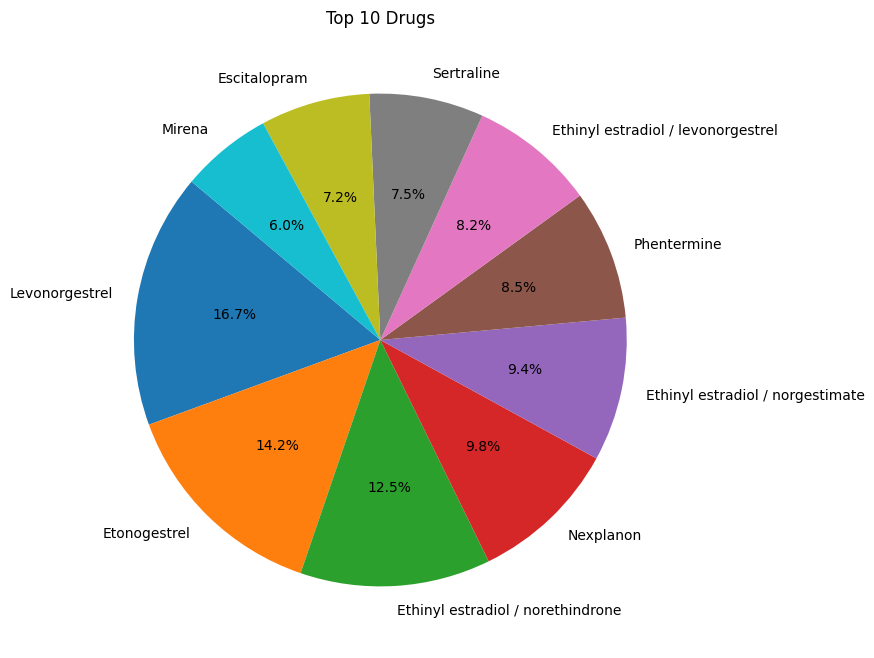

In [ ]:
# 'drugs' 열에서 각 약물의 개수
drug_counts = df['drugName'].value_counts()

# 상위 10개 약물 선택
top_drugs = drug_counts.head(10)

# 원형 그래프
plt.figure(figsize=(8, 8))
top_drugs.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Drugs')
plt.ylabel('')
plt.show()

In [ ]:
# 각 리뷰의 길이를 계산합니다.
df['length'] = df['review'].apply(len)

print(f"가장 짧은 문장 길이: {df['length'].min()}")
print(f'위치는 {df['length'].idxmin()}')
print(f"가장 긴 문장 길이: {df['length'].max()}")
print(f'위치는 {df['length'].idxmax()}')
import numpy as np
print('리뷰 길이 평균값: {:.2f}'.format((df['length']).mean()))
print('리뷰 길이 표준편차: {:.2f}'.format(df['length'].std()))
print('리뷰 길이 중간값: {}'.format(df['length'].median()))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(df['length'],25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(df['length'],75)))

가장 짧은 문장 길이: 3
위치는 42909
가장 긴 문장 길이: 10433
위치는 75663
리뷰 길이 평균값: 448.35
리뷰 길이 표준편차: 237.61
리뷰 길이 중간값: 444.0
리뷰 길이 제1사분위: 255.0
리뷰 길이 제3사분위: 676.0


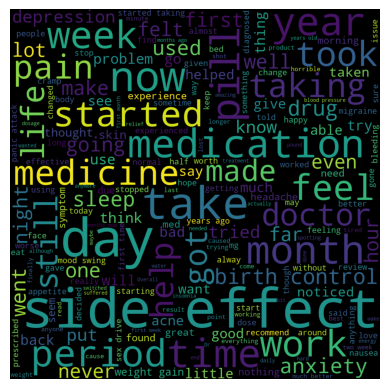

In [ ]:
from wordcloud import WordCloud
wordcloud=WordCloud(width=1000,height=1000).generate(' '.join(df['review']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# rating이 너무 이상한 값들 제거
df_original=df.copy()
drops = []

for drug in df['drugName'].unique():
    group = df[df['drugName'] == drug]

    Q1 = group['rating'].quantile(0.25)
    Q3 = group['rating'].quantile(0.75)
    IQR = Q3 - Q1

    condition = (group['rating'] < (Q1 - 3 * IQR)) | (group['rating'] > (Q3 + 3 * IQR))
    drops.extend(group[condition].index)

# 이상치를 포함하는 행을 제거
df.drop(index=drops, inplace=True)

# 결과 확인
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 146106 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   146106 non-null  int64  
 1   drugName     146106 non-null  object 
 2   condition    146106 non-null  object 
 3   review       146106 non-null  object 
 4   rating       146106 non-null  float64
 5   usefulCount  146106 non-null  int64  
 6   length       146106 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 8.9+ MB
None


In [ ]:
average_ratings = df.groupby('drugName')['rating'].mean().reset_index()

# 결과 출력
print(average_ratings)

                                  drugName     rating
0                A + D Cracked Skin Relief  10.000000
1                               A / B Otic  10.000000
2     Abacavir / dolutegravir / lamivudine   8.608696
3                                Abatacept   7.157895
4                                  Abilify   6.612385
...                                    ...        ...
3187                                Zytiga   9.714286
3188                                 Zyvox   9.000000
3189                               ZzzQuil   2.500000
3190                                  ella   7.568182
3191                                femhrt   5.500000

[3192 rows x 2 columns]


In [ ]:
dict = average_ratings.set_index('drugName')['rating'].to_dict()
df['average_rating_drug'] = df['drugName'].map(dict)

In [ ]:
print(df['review'].nunique( )) #최대 4만개의 중복된 리뷰들이 있음 - 두개를 구입한 경우.

101985


In [ ]:
df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 8 else (0 if x >= 4 else -1))

In [ ]:
X=df['condition']
y=df['drugName']
review=df['review']

In [ ]:
# 모델에 필요한 라이브러리
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

### 토큰화 - nltk 불용어 처리

In [ ]:
import nltk
import string
from collections import Counter
nltk.download('punkt')
nltk.download('stopwords')

# 빈도수 계산을 위한 리스트 초기화
li = []
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation)
# df의 모든 리뷰에 대해 반복
for review in df['review']:
    # 토큰화
    tokens = nltk.word_tokenize(review)
    # 불용어 및 구두점 제거
    filtered_tokens = [t for t in tokens if t.lower() not in stopwords]
    li.extend(filtered_tokens)

# 단어 빈도수 계산
word_counts = Counter(li)

# 빈도수가 높은 순으로 정렬
word_counts = word_counts.most_common()

# 인코딩 (빈도수 순으로 1부터 인코딩)
word_encoding = {word: i+1 for i, (word, _) in enumerate(word_counts)}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Woosung\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Woosung\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


: 

In [ ]:
word_encoding

{'``': 1,
 "''": 2,
 "n't": 3,
 'day': 4,
 "'m": 5,
 'side': 6,
 'taking': 7,
 'years': 8,
 "'ve": 9,
 "'s": 10,
 'effects': 11,
 'pain': 12,
 'take': 13,
 'first': 14,
 'months': 15,
 'get': 16,
 'like': 17,
 'days': 18,
 'started': 19,
 'time': 20,
 'feel': 21,
 'would': 22,
 '2': 23,
 'back': 24,
 '3': 25,
 'weeks': 26,
 'pill': 27,
 'medication': 28,
 'week': 29,
 'one': 30,
 'weight': 31,
 'life': 32,
 'doctor': 33,
 'took': 34,
 'month': 35,
 'period': 36,
 'got': 37,
 'anxiety': 38,
 'bad': 39,
 'much': 40,
 'also': 41,
 'really': 42,
 'could': 43,
 'still': 44,
 'better': 45,
 'medicine': 46,
 'since': 47,
 'work': 48,
 'went': 49,
 'two': 50,
 'felt': 51,
 'never': 52,
 'night': 53,
 'year': 54,
 'sleep': 55,
 'every': 56,
 'well': 57,
 'control': 58,
 'go': 59,
 'good': 60,
 'ago': 61,
 'great': 62,
 'even': 63,
 '4': 64,
 '5': 65,
 'tried': 66,
 'drug': 67,
 'hours': 68,
 'dose': 69,
 'little': 70,
 'depression': 71,
 'made': 72,
 'prescribed': 73,
 'acne': 74,
 'going': 75,

In [ ]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,usefulCount,length,average_rating_drug,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,27,79,5.925373,1
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,192,741,5.935484,1
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,17,745,7.600000,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,10,443,7.517073,1
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,37,699,9.423913,1


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm') #en_core_web_md 나 en_core_web_lg도 가능
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'or', 'whither', 'bottom', 'became', 'nobody', 'yourselves', 'seem', 'serious', 'what', 'toward', 'yet', 'from', 'twelve', '‘m', 'them', 'hers', 'four', 'few', 'thereby', 'by', 'towards', 'again', 'across', 'have', 'sixty', 'too', 'your', 'meanwhile', 'my', 'regarding', 'latter', 'ourselves', 'whereas', 'give', "'d", 'becoming', 'quite', 'over', 'hereafter', 'beforehand', 'eight', 'against', 'if', 'somewhere', 'more', 'i', 'however', 'while', 'be', 'everywhere', 'nowhere', 'until', 'thus', 'itself', 'namely', 'just', 'seemed', 'herself', 'enough', 'alone', '‘ve', 'at', 'except', 'also', 'therefore', 'as', 'whereby', 'say', 'because', 'seems', 'which', 'then', 'neither', 'her', 'third', 'thereupon', 'already', 'others', 'else', 'both', 'whoever', 'former', 'these', 'one', 'last', 'beyond', 'moreover', 'upon', 'around', 'forty', '‘re', 'further', 'has', 'most', 'might', 'please', 'up', 'perhaps', 'a', 'this', '‘s', 'is', 'everyone', "'ve", 'first', 'our', 'never', 'once', 'back', 'yours

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
import string
from collections import Counter

# 빈도수 계산을 위한 리스트 초기화
li = []
stopwords = spacy.lang.en.stop_words.STOP_WORDS
# df의 모든 리뷰에 대해 반복
for review in df['review']:
    # 토큰화
    review=nlp(review)
    filtered_tokens = [token.text for token in review if not token.is_stop and not token.is_punct]
    li.extend(filtered_tokens)

# 단어 빈도수 계산
word_counts = Counter(li)

# 빈도수가 높은 순으로 정렬
word_counts = word_counts.most_common()

# 인코딩 (빈도수 순으로 1부터 인코딩)
word_encoding = {word: i+1 for i, (word, _) in enumerate(word_counts)}

In [ ]:
word_encoding

{'.': 1,
 ',': 2,
 '``': 3,
 "''": 4,
 '!': 5,
 'day': 6,
 'taking': 7,
 ')': 8,
 'years': 9,
 '(': 10,
 'effects': 11,
 'pain': 12,
 'months': 13,
 'like': 14,
 'days': 15,
 'started': 16,
 'time': 17,
 'feel': 18,
 '2': 19,
 '3': 20,
 'weeks': 21,
 'pill': 22,
 'medication': 23,
 'week': 24,
 'weight': 25,
 'life': 26,
 'doctor': 27,
 'took': 28,
 'month': 29,
 'period': 30,
 'got': 31,
 'anxiety': 32,
 'bad': 33,
 'better': 34,
 'medicine': 35,
 'work': 36,
 'went': 37,
 'felt': 38,
 'night': 39,
 'year': 40,
 'sleep': 41,
 'control': 42,
 'good': 43,
 'ago': 44,
 'great': 45,
 'having': 46,
 '4': 47,
 '5': 48,
 'tried': 49,
 'drug': 50,
 'hours': 51,
 'dose': 52,
 'little': 53,
 'depression': 54,
 'prescribed': 55,
 'acne': 56,
 'going': 57,
 'works': 58,
 'worked': 59,
 'birth': 60,
 'mg': 61,
 'help': 62,
 'severe': 63,
 '6': 64,
 'feeling': 65,
 'getting': 66,
 '10': 67,
 '...': 68,
 '&': 69,
 'far': 70,
 'use': 71,
 'away': 72,
 '-': 73,
 'skin': 74,
 'times': 75,
 'mood': 76,


In [ ]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])
review_seq = tokenizer.texts_to_sequences(df['review'])
print(len(tokenizer.word_index))
print(df['review'].iloc[0])
print(review_seq[0])
print(df['review'].iloc[1])
print(review_seq[1])




51671
"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"
[7, 36, 26, 32, 187, 1, 41, 7, 14, 824, 11, 2812, 104, 140, 2, 3832, 1548]
"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. 
We have tried many different medications and so far this is the most effective."
[5, 652, 18, 3517, 221, 501, 1649, 74, 11, 3120, 275, 403, 1219, 59, 160, 366, 13, 144, 74, 59, 16

In [ ]:
word_idx = tokenizer.word_index
word_count = tokenizer.word_counts
word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)
print("인덱스:", word_idx)
print("사용수:", word_count)

인덱스: {'i': 1, 'and': 2, 'the': 3, 'to': 4, 'my': 5, 'a': 6, 'it': 7, 'for': 8, 'was': 9, 'have': 10, 'of': 11, 'on': 12, 'this': 13, 'in': 14, 'but': 15, 'me': 16, 'had': 17, 'is': 18, 'with': 19, 'that': 20, 'not': 21, 'so': 22, 'been': 23, 'at': 24, 'after': 25, 'no': 26, 'day': 27, 'as': 28, 'am': 29, 'about': 30, 'now': 31, "i'm": 32, 'side': 33, 'taking': 34, 'all': 35, 'has': 36, 'years': 37, "i've": 38, 'pain': 39, 'effects': 40, 'first': 41, 'take': 42, 'only': 43, 'months': 44, 'started': 45, 'like': 46, '2': 47, 'get': 48, 'up': 49, 'you': 50, 'be': 51, 'days': 52, 'just': 53, 'very': 54, 'time': 55, 'out': 56, 'or': 57, 'from': 58, 'when': 59, '3': 60, 'feel': 61, 'if': 62, 'would': 63, 'because': 64, 'back': 65, 'pill': 66, 'more': 67, 'one': 68, '\r': 69, 'weeks': 70, "it's": 71, 'are': 72, 'week': 73, 'also': 74, 'took': 75, 'period': 76, 'medication': 77, 'doctor': 78, 'weight': 79, 'before': 80, 'then': 81, 'got': 82, 'will': 83, 'did': 84, 'month': 85, 'do': 86, 'which

In [ ]:
token = 'bless'

# 해당 토큰을 포함하는 행들을 필터링하고, 이들 행의 'rating' 열에 대한 평균을 계산
average_rating = df[df['review'].str.contains(token)]['rating'].mean()

print(f"'{token}' 토큰이 있는 문장의 평균 평점 : {average_rating}")

'bless' 토큰이 있는 문장의 평균 평점 : 8.941732283464567


대부분 7점 초반 6점 후반
side: 7.33? side effect: 7.41 negative: 7.5 anymore 6.96 immediately 6.3 shits: 7.45 nothing 7.08


fuck 2.71
fucking 2.33
shit 5.79
crazy 5.9
awful 5.5
suck 6.15
pain 6.75
bad 6.71
still 6.6
never 6.34
ruin/ruined 4.0

god 7.2
thankfully 7.4
nice 7.5
perfect 7.8
perfectly 7.65
great : 7.9
life : 7.92
thanks : 8.1
best: 8.5
fantastic: 8.6
bless: 8.9
miracle: 9.12
saved: 9.4

In [ ]:
#df_original.to_csv('C:\\Users\\Woosung\\Desktop\\공부\\2024\\Estsoft\\프로젝트2\\files\\drugsedit.csv')